**Importing All Needed Libraries**


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Creating the DataFrame**

In [28]:
df=pd.read_csv('/content/diabetes.csv')

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Performing basic EDA With the data**

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<ipython-input-32-933bc77d67f5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Outcome'],ax=axes[1,0])


Text(0.5, 1.0, 'Count Plot')

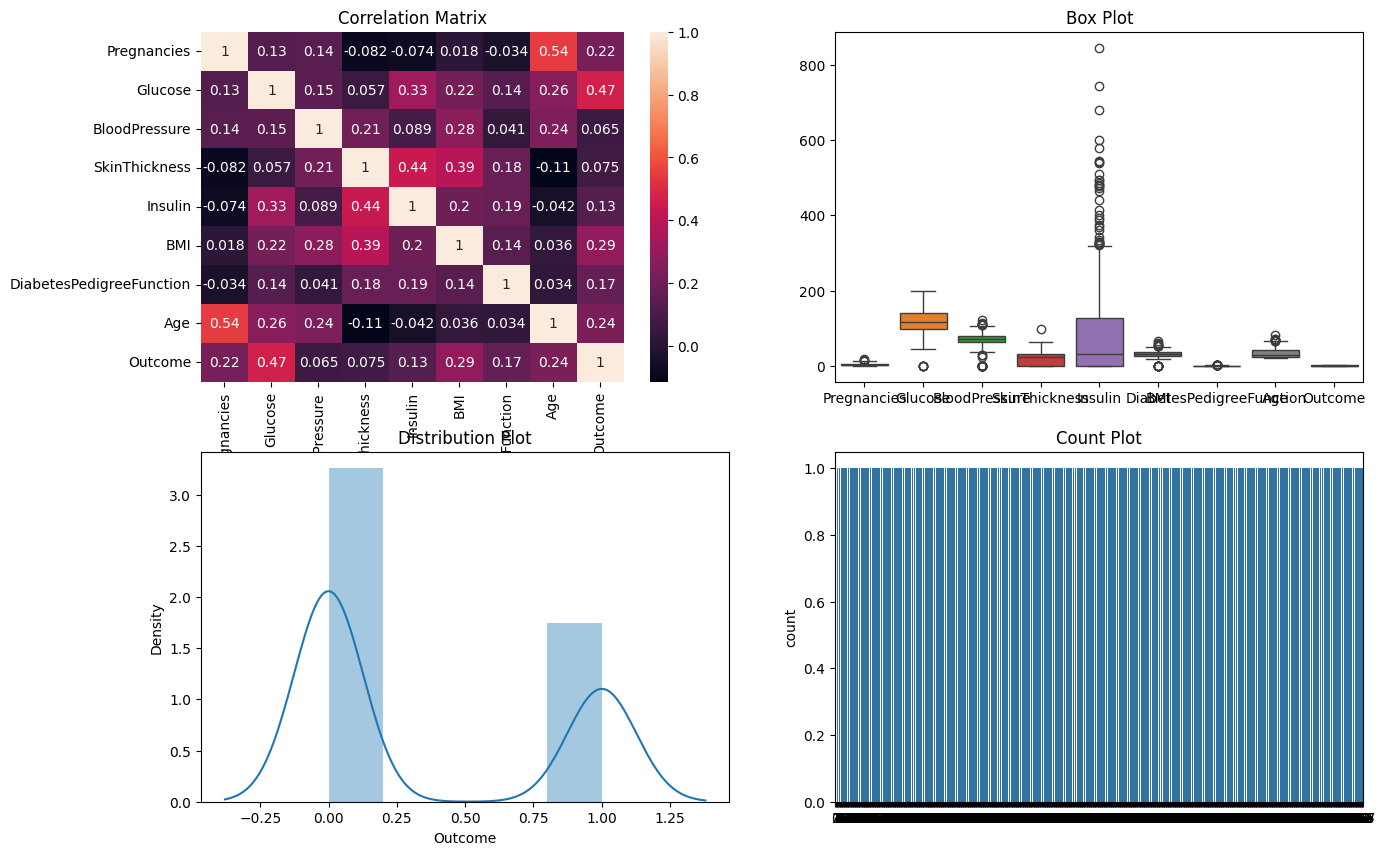

In [32]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
sns.heatmap(df.corr(),annot=True,ax=axes[0,0])
axes[0,0].set_title('Correlation Matrix')
sns.boxplot(df,ax=axes[0,1])
axes[0,1].set_title('Box Plot')
sns.distplot(df['Outcome'],ax=axes[1,0])
axes[1,0].set_title('Distribution Plot')
sns.countplot(df['Outcome'],ax=axes[1,1])
axes[1,1].set_title('Count Plot')


From the above plots, we see that there are outliers in the dataset which we will no treat using the outlier method


In [33]:
Q1=df.quantile(.25)
Q3=df.quantile(.75)
IQR=Q3-Q1
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR
df=df[(df>LB)&(df<UB)]

<Axes: >

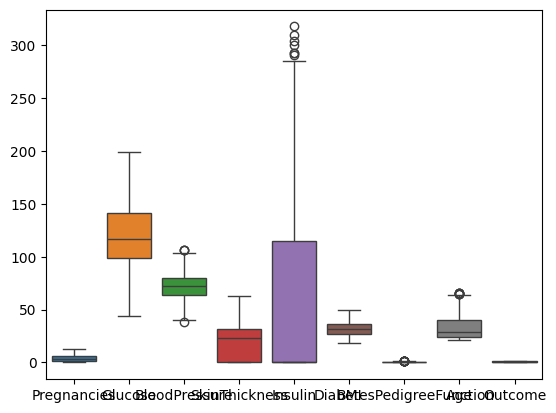

In [34]:
sns.boxplot(df)

DataFrame has been treated with outlier Analysis, now we will split the data into X and Y


In [35]:
df=df.dropna().reset_index(drop=True)

In [36]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [37]:
X=df.iloc[:,:-1]

In [38]:
Y=df['Outcome']

In [21]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [40]:
regressor=LogisticRegression()

In [41]:
regressor.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred_logit=regressor.predict(x_test)

In [43]:
decision_tree=DecisionTreeClassifier()

In [45]:
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
y_pred_dt=decision_tree.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [48]:
acc_scr=accuracy_score(y_test,y_pred_logit)
cnf_met=confusion_matrix(y_test,y_pred_logit)
cls_rep=classification_report(y_test,y_pred_logit)
print(acc_scr)
print(cnf_met)
print(cls_rep)

0.8046875
[[86  6]
 [19 17]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        92
           1       0.74      0.47      0.58        36

    accuracy                           0.80       128
   macro avg       0.78      0.70      0.72       128
weighted avg       0.80      0.80      0.79       128



In [49]:
acc_dec=accuracy_score(y_test,y_pred_dt)
cnf_met_dt=confusion_matrix(y_test,y_pred_dt)
cls_rep_dt=classification_report(y_test,y_pred_dt)
print(acc_dec)
print(cnf_met_dt)
print(cls_rep_dt)

0.734375
[[77 15]
 [19 17]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        92
           1       0.53      0.47      0.50        36

    accuracy                           0.73       128
   macro avg       0.67      0.65      0.66       128
weighted avg       0.73      0.73      0.73       128



In [50]:
from sklearn import tree

[Text(0.5377998737373737, 0.9666666666666667, 'x[1] <= 142.5\ngini = 0.436\nsamples = 511\nvalue = [347, 164]'),
 Text(0.2492108585858586, 0.9, 'x[1] <= 101.5\ngini = 0.339\nsamples = 398\nvalue = [312, 86]'),
 Text(0.10858585858585859, 0.8333333333333334, 'x[7] <= 42.5\ngini = 0.133\nsamples = 153\nvalue = [142, 11]'),
 Text(0.07575757575757576, 0.7666666666666667, 'x[6] <= 1.116\ngini = 0.084\nsamples = 137\nvalue = [131, 6]'),
 Text(0.06565656565656566, 0.7, 'x[5] <= 37.35\ngini = 0.071\nsamples = 136\nvalue = [131, 5]'),
 Text(0.04040404040404041, 0.6333333333333333, 'x[2] <= 51.0\ngini = 0.034\nsamples = 114\nvalue = [112, 2]'),
 Text(0.020202020202020204, 0.5666666666666667, 'x[4] <= 82.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.010101010101010102, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.030303030303030304, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.06060606060606061, 0.5666666666666667, 'x[6] <= 0.163\ngini = 0.018\nsamples = 110\nvalu

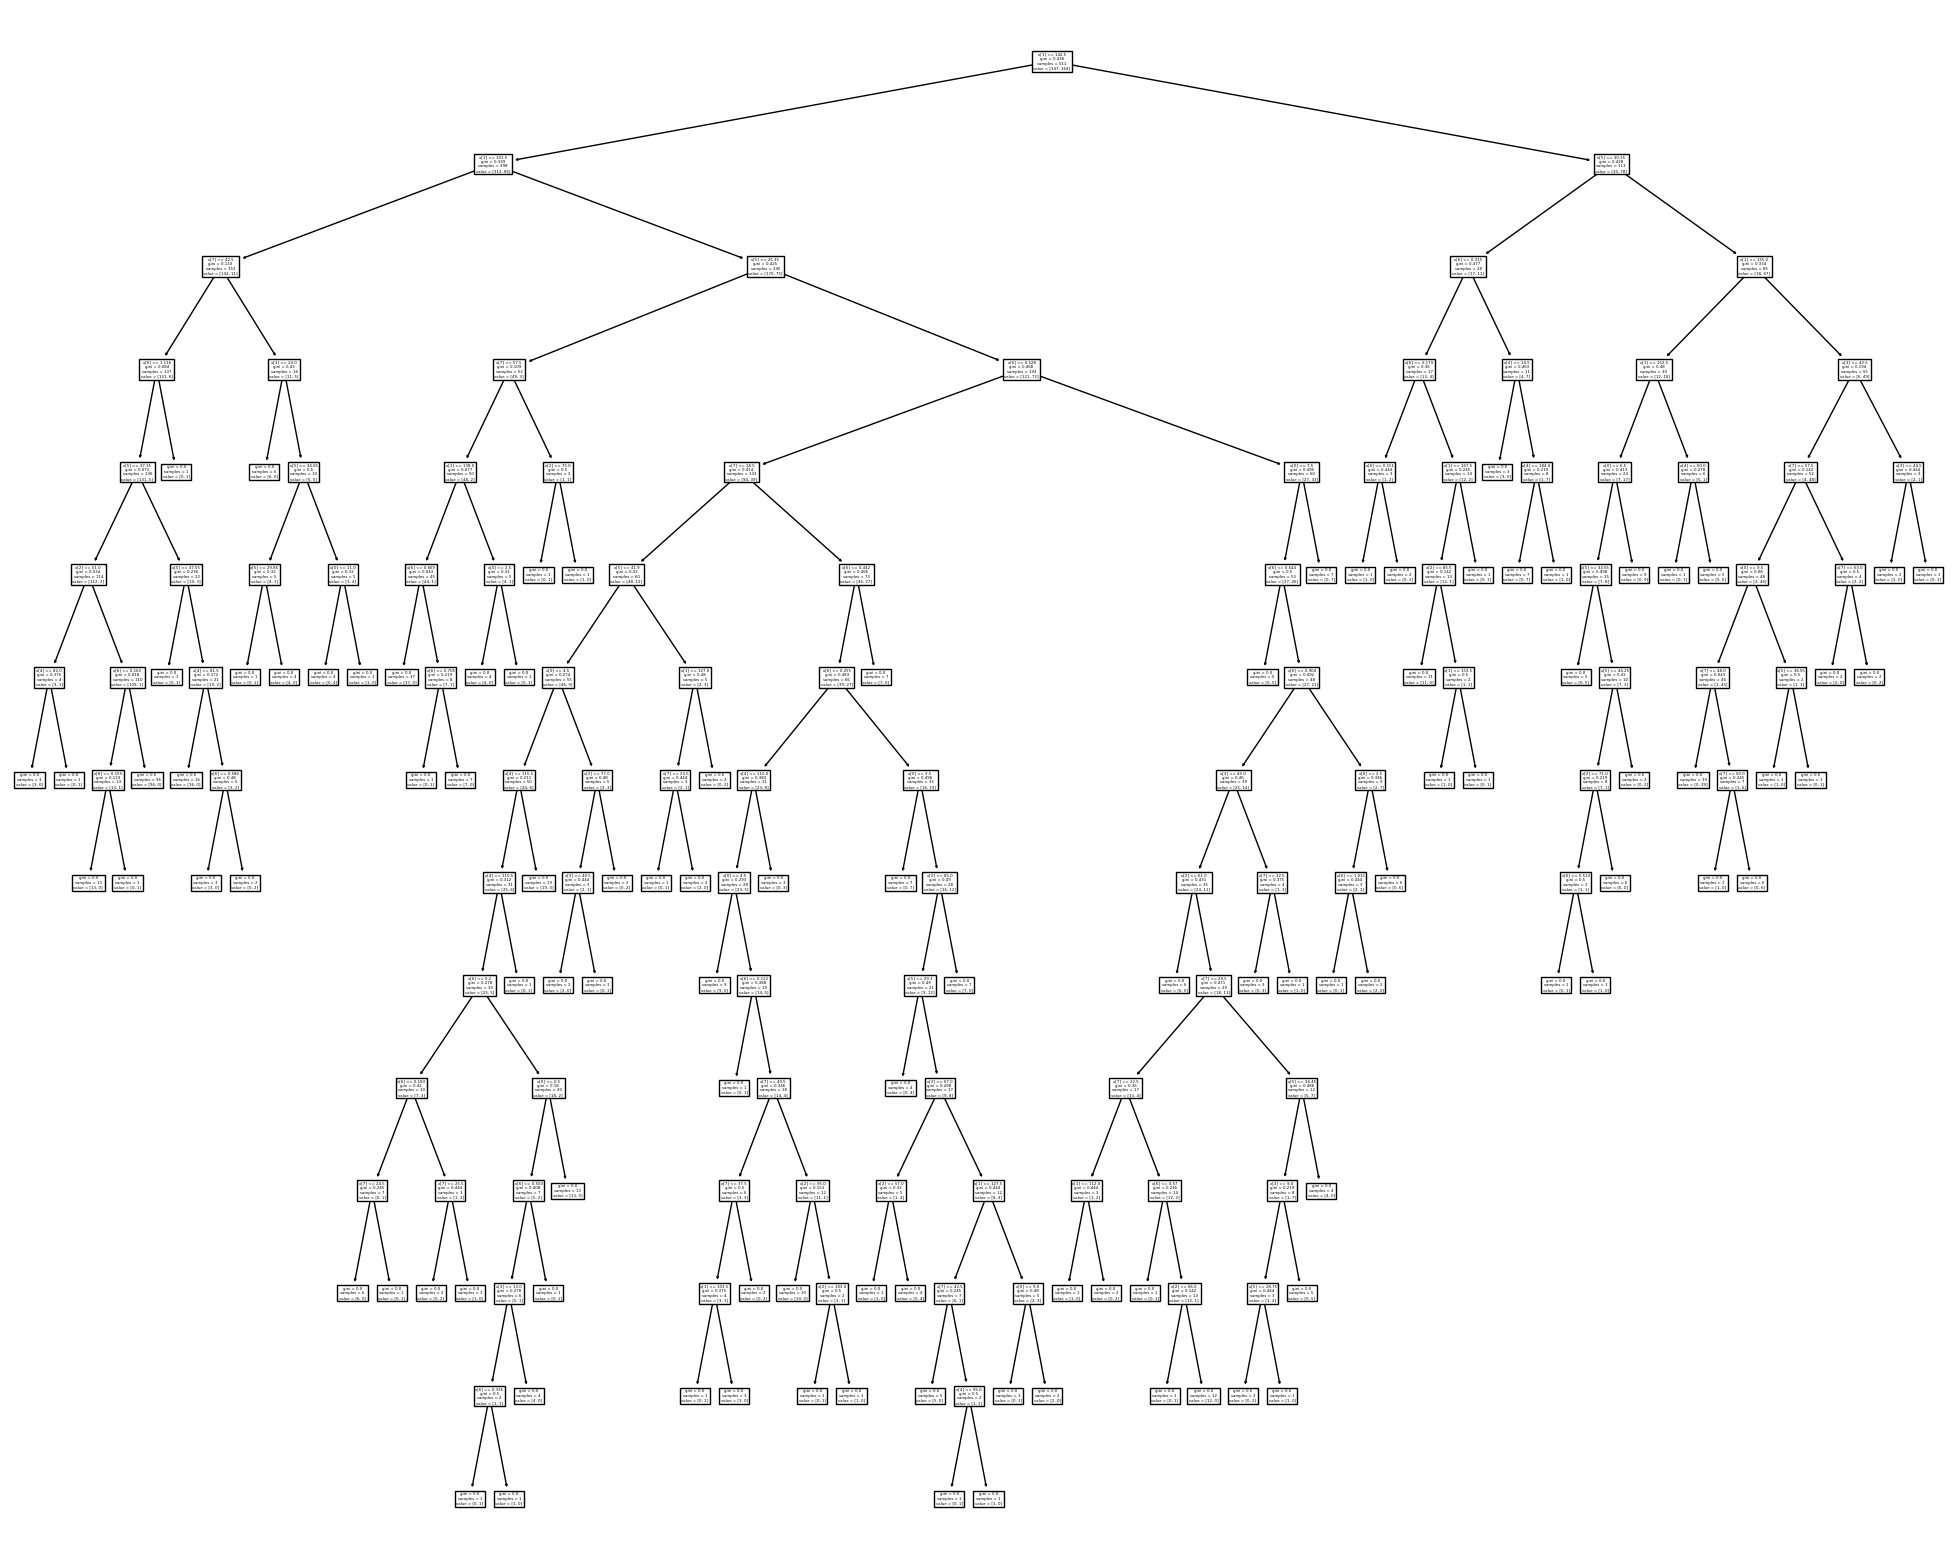

In [53]:
fig=plt.figure(figsize=(25,20))
tree.plot_tree(decision_tree,)